#### Markov chain Monte Carlo Algorithm for d-dimensional sphere

List of the configuration point: x = [x_0, x_1, x_2, x_3, ..., x{d-1}]

Initial value of {x} = [0, 0, ....upto d-1], 

Code generates the set of Radius for d-dimensional sphere via Markov sampling:

In [1]:
import random, math
import numpy as np

#d = the dimension of a system
#n_trials = # of trials
#old_radius_square = 0.0

def d_dimensional_Volume(d, n_trials, old_radius_square):
    #initialization of the quantity
    x = [0]*d 
    delta =0.1
    n_hits = 0
    Radius = []
    for i in range(n_trials):
        k = random.randint(0, d - 1)
        x_old_k = x[k]
        x_new_k = x_old_k + random.uniform(-delta, delta)
        new_radius_square = old_radius_square + x_new_k ** 2 - x_old_k ** 2
    
        if abs(new_radius_square) < 1.0 and abs((x_new_k)**2) < 1.0: 
            x[k] = x_new_k  #update the old x[k]
            old_radius_square = new_radius_square #update the old_radius 
            Radius.append(math.sqrt(new_radius_square))
    return(Radius)

#### B1. Comparising of the radius obtained via MC sampling and directly for P(r) = 4r^3 (0<r<1), d = 4 

r = sqrt(x[0]** 2 + x[1]** 2 + ... +x[3]** 2) 

In [2]:
#Generate the radius of a d_dimensional_sphere by Markov sampling
d = 4
n_trials = 1000000
old_radius_square = 0.0
Radius = d_dimensional_Volume(4, 1000000, 0.0)

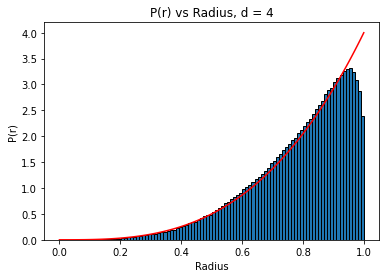

In [3]:
import matplotlib.pyplot as plt
import pylab
pylab.hist(Radius,100,density = 'True', stacked = 'True', ec = 'black')
r = np.linspace(0,1, 100)
plt.plot(r, 4*r**3, color = 'red' )
plt.xlabel('Radius')
plt.ylabel('P(r)')
plt.title('P(r) vs Radius, d = 4')
plt.savefig('plot_Markov_chain_d_4.png')

#### B1. Comparising of the radius obtained via MC sampling and directly for P(r) = 20r^19 (0<r<1), d = 20 

r = sqrt(x[0]** 2 + x[1]** 2 + ... +x[3]** 2) 

In [4]:
#Generate the radius of a d_dimensional_sphere by Markov sampling
d = 20
n_trials = 1000000
old_radius_square = 0.0
Radius1 = d_dimensional_Volume(20, 1000000, 0.0)

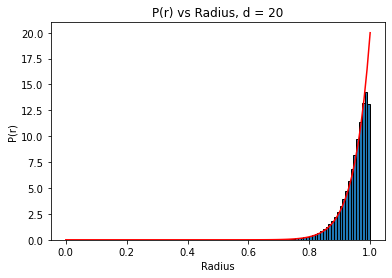

In [5]:
import matplotlib.pyplot as plt
import pylab
pylab.hist(Radius1,100,density = 'True', stacked = 'True', ec = 'black')
r = np.linspace(0,1, 100)
plt.plot(r, 20*r**19, color = 'red' )
plt.xlabel('Radius')
plt.ylabel('P(r)')
plt.title('P(r) vs Radius, d = 20')
plt.savefig('plot_Markov_chain_d_20.png')

#### B2. Calculation of $<Q>$

#### Calculation of Q analytically

In [6]:
import random, math
import numpy as np
    
def V_sph(dim):
    return math.pi ** (dim / 2.0) / math.gamma(dim / 2.0 + 1.0)

print("Q(4) = ", V_sph(4)/V_sph(3))
print("Q(200) = ", V_sph(200)/V_sph(199))

Q(4) =  1.1780972450961724
Q(200) =  0.17702396769643863


#### Calculation of Q numerically

In [9]:
# Caluclation of Q for d = 4
import random, math
import numpy as np

#initialization of the quantity
d = 4
n_trials = 1000000
old_radius_square = 0.0
x = [0]*d 
delta =0.1
n_hits = 0

for i in range(n_trials):
    k = random.randint(0, d - 1)
    x_old_k = x[k]
    x_new_k = x_old_k + random.uniform(-delta, delta)
    new_radius_square = old_radius_square + x_new_k ** 2 - x_old_k ** 2
    
    if abs(new_radius_square) < 1.0 and abs((x_new_k)**2) < 1.0: 
        x[k] = x_new_k  #update the old x[k]
        old_radius_square = new_radius_square #update the old_radius 
        delta_R = random.uniform(-1.0, 1.0)
        if (old_radius_square + delta_R)**2 <1.0: n_hits +=1
            
print("Q(4) = ", 2*n_hits/float(n_trials)) 

Q(4) =  1.292914


In [11]:
# Caluclation of Q for d = 4
import random, math
import numpy as np

#initialization of the quantity
d = 200
n_trials = 1000000
old_radius_square = 0.0
x = [0]*d 
delta =0.1
n_hits = 0

for i in range(n_trials):
    k = random.randint(0, d - 1)
    x_old_k = x[k]
    x_new_k = x_old_k + random.uniform(-delta, delta)
    new_radius_square = old_radius_square + x_new_k ** 2 - x_old_k ** 2
    
    if abs(new_radius_square) < 1.0 and abs((x_new_k)**2) < 1.0: 
        x[k] = x_new_k  #update the old x[k]
        old_radius_square = new_radius_square #update the old_radius 
        delta_R = random.uniform(-1.0, 1.0)
        if (old_radius_square + delta_R)**2 <1.0: n_hits +=1
            
print("Q(200) = ", 2*n_hits/float(n_trials)) 

Q(200) =  0.73842


- Analytical value for Q(4) = 1.1780972450961724

  Numerical value of Q(4) = 1.292914

- Analytical value of Q(200) = 0.17702396769643863

  Numerical value of A(200) = 0.737614
